# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [6]:
#Single Record Test
cityName = cities[0].city_name

weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={cityName}&appid={weather_api_key}&units=imperial'

response = requests.get(weather_url).json()
print(response)

{'coord': {'lon': -51.05, 'lat': -23.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 80.53, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1603585829, 'sys': {'type': 1, 'id': 8399, 'country': 'BR', 'sunrise': 1603529015, 'sunset': 1603575169}, 'timezone': -10800, 'id': 3461588, 'name': 'Ibiporã', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
weather_data = [] #Empty List to hold cityObjs after they are created
count = 0 #Counter for city data collected from the API
for city in cities:
    cityName = city.city_name

    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={cityName}&appid={weather_api_key}&units=imperial'
    call = requests.get(weather_url) #Makes the call to the API
    if call: #Successful response
        count += 1
        print(f'Processing Record {count}: {cityName}')
        response = call.json() #Retrieves response data from API call as JSON object
        #Creace diction to hold single city weather data
        cityObj = {"City":cityName,
           "Lat": response['coord']['lat'],
           "Lon": response['coord']['lon'],
           "Max Temp": response['main']['temp_max'],
           "Humidity": response['main']['humidity'],
           "Cloudiness": response['clouds']['all'],
           "Wind Speed": response['wind']['speed'],
           "Country": response['sys']['country'],
           "Date": response['dt']
          }
        #Append single city weather data to weather_data list
        weather_data.append(cityObj)
        
    else:
        print(f'City not found: {cityName}')
print("Done")

Processing Record 1: ibipora
Processing Record 2: chokurdakh
Processing Record 3: carnarvon
City not found: taolanaro
Processing Record 4: new norfolk
Processing Record 5: punta arenas
Processing Record 6: bredasdorp
Processing Record 7: linkoping
Processing Record 8: pevek
Processing Record 9: kutum
Processing Record 10: camacha
Processing Record 11: srednekolymsk
Processing Record 12: yellowknife
Processing Record 13: chuy
Processing Record 14: lakes entrance
Processing Record 15: pergine valsugana
Processing Record 16: santa isabel
Processing Record 17: atuona
Processing Record 18: dikson
Processing Record 19: bluff
Processing Record 20: port elizabeth
City not found: urdzhar
Processing Record 21: aklavik
Processing Record 22: provideniya
Processing Record 23: ayan
City not found: illoqqortoormiut
Processing Record 24: wanaka
Processing Record 25: saskylakh
Processing Record 26: hermanus
Processing Record 27: port alfred
Processing Record 28: bambous virieux
Processing Record 29: ma

Processing Record 243: hamilton
Processing Record 244: filadelfia
Processing Record 245: san policarpo
Processing Record 246: gornopravdinsk
City not found: vaitupu
Processing Record 247: sulangan
Processing Record 248: husavik
Processing Record 249: mazagao
City not found: burica
Processing Record 250: puerto ayacucho
Processing Record 251: marang
Processing Record 252: karratha
Processing Record 253: byron bay
Processing Record 254: yebaishou
Processing Record 255: samarai
Processing Record 256: otane
Processing Record 257: rafai
Processing Record 258: ostrovnoy
Processing Record 259: monrovia
Processing Record 260: kaniama
Processing Record 261: san patricio
Processing Record 262: mahibadhoo
Processing Record 263: rosario do sul
Processing Record 264: xanlar
Processing Record 265: flinders
Processing Record 266: port shepstone
Processing Record 267: praia da vitoria
City not found: sentyabrskiy
Processing Record 268: lagoa
Processing Record 269: boralday
Processing Record 270: kawal

Processing Record 484: najran
Processing Record 485: ixtapa
Processing Record 486: baisha
Processing Record 487: darhan
Processing Record 488: carlsbad
City not found: louisbourg
Processing Record 489: svetlyy
Processing Record 490: tocopilla
Processing Record 491: pervomayskoye
Processing Record 492: urucurituba
Processing Record 493: podor
City not found: karaul
Processing Record 494: wasilla
Processing Record 495: xinzhi
Processing Record 496: pascagoula
Processing Record 497: camp verde
Processing Record 498: abeche
Processing Record 499: sur
Processing Record 500: sao luis
Processing Record 501: maceio
Processing Record 502: kisarawe
Processing Record 503: avera
Processing Record 504: vardo
City not found: tumannyy
Processing Record 505: qasigiannguit
Processing Record 506: grand gaube
City not found: karamea
Processing Record 507: tezu
Processing Record 508: jucuaran
Processing Record 509: iqaluit
Processing Record 510: guerrero negro
Processing Record 511: nybro
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Confirm we have 500+ cities
print(len(weather_data))

#Convert raw data into DataFrame
weather_df = pd.DataFrame(weather_data)
#Export to output_data_file
weather_df.to_csv(output_data_file, encoding="utf-8",index=False)
weather_df

563


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ibipora,-23.27,-51.05,75.20,78,0,2.24,BR,1603585829
1,chokurdakh,70.63,147.92,14.49,97,95,7.25,RU,1603585683
2,carnarvon,-24.87,113.63,73.40,88,90,16.11,AU,1603585673
3,new norfolk,-42.78,147.06,54.00,48,79,1.99,AU,1603585816
4,punta arenas,-53.15,-70.92,42.80,93,100,14.99,CL,1603585650
...,...,...,...,...,...,...,...,...,...
558,eregli,37.51,34.05,56.95,36,87,2.04,TR,1603585986
559,battle creek,42.32,-85.18,41.00,65,75,4.70,US,1603585800
560,vysokopillya,47.49,33.53,51.80,76,0,4.85,UA,1603585986
561,patacamaya,-17.23,-67.92,53.17,59,5,6.29,BO,1603585987


In [9]:
summary_df = weather_df.describe()
summary_df

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.216607,16.999094,59.554476,73.854352,57.081705,8.159378,1.603586e+09
std,34.119959,91.541114,20.187697,20.079028,39.565573,5.588746,9.368354e+01
min,-54.800000,-175.200000,6.550000,7.000000,0.000000,0.340000,1.603585e+09
25%,-8.850000,-63.355000,46.200000,63.500000,15.000000,3.815000,1.603586e+09
50%,21.460000,20.230000,64.040000,79.000000,75.000000,6.930000,1.603586e+09
75%,48.820000,101.555000,77.000000,89.000000,93.500000,11.410000,1.603586e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,31.210000,1.603586e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
if(summary_df['Humidity']['max'] > 100.0):
    #  Get the indices of cities that have humidity over 100% and drop them.
    weather_df.drop(weather_df[weather_df['Humidity'] > 100.0].index, inplace=True)
    #Re-build summary
    summary_df = weather_df.describe()
analysisDate = dt.datetime.fromtimestamp(summary_df['Date']['mean']).strftime("%m/%d/%Y")
summary_df

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.216607,16.999094,59.554476,73.854352,57.081705,8.159378,1.603586e+09
std,34.119959,91.541114,20.187697,20.079028,39.565573,5.588746,9.368354e+01
min,-54.800000,-175.200000,6.550000,7.000000,0.000000,0.340000,1.603585e+09
25%,-8.850000,-63.355000,46.200000,63.500000,15.000000,3.815000,1.603586e+09
50%,21.460000,20.230000,64.040000,79.000000,75.000000,6.930000,1.603586e+09
75%,48.820000,101.555000,77.000000,89.000000,93.500000,11.410000,1.603586e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,31.210000,1.603586e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

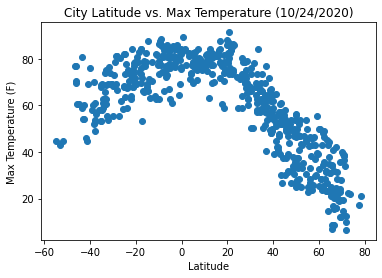

In [80]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature ({analysisDate})')
plt.savefig("output_data/World_Lat_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

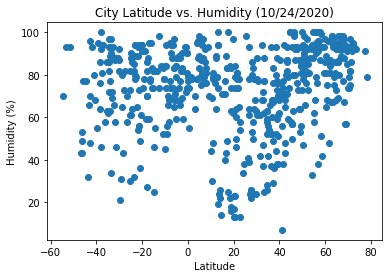

In [81]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({analysisDate})')
plt.savefig("output_data/World_Lat_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

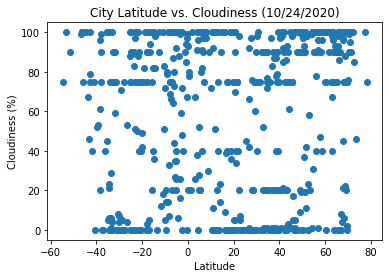

In [82]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({analysisDate})')
plt.savefig("output_data/World_Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

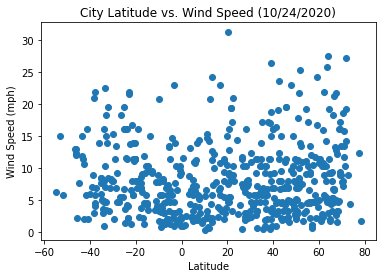

In [83]:
plt.scatter(x=weather_df['Lat'],y=weather_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed ({analysisDate})')
plt.savefig("output_data/World_Lat_Wind.png")
plt.show()

## Linear Regression

In [79]:
north_df = weather_df[weather_df['Lat'] >= 0]
south_df = weather_df[weather_df['Lat'] < 0]
north_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,chokurdakh,70.63,147.92,14.49,97,95,7.25,RU,1603585683
6,linkoping,58.41,15.62,42.80,93,96,5.82,SE,1603585831
7,pevek,69.70,170.31,27.79,91,2,13.47,RU,1603585670
8,kutum,14.20,24.67,69.87,26,23,12.15,SD,1603585832
9,camacha,33.08,-16.33,62.60,77,20,3.36,PT,1603585832
...,...,...,...,...,...,...,...,...,...
556,grand-santi,4.25,-54.38,73.62,96,96,2.28,GF,1603585986
558,eregli,37.51,34.05,56.95,36,87,2.04,TR,1603585986
559,battle creek,42.32,-85.18,41.00,65,75,4.70,US,1603585800
560,vysokopillya,47.49,33.53,51.80,76,0,4.85,UA,1603585986


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9005847258019934


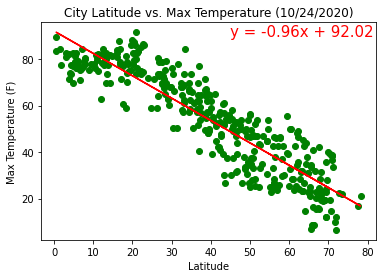

In [71]:
slope, intercept, r_value, p_value, std_err = linregress(north_df['Lat'],north_df['Max Temp'])

print(f'The r-value is: {r_value}')
y_values = north_df['Lat']*slope+intercept
plt.scatter(north_df['Lat'],north_df['Max Temp'],color="g")
plt.plot(north_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(45,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature ({analysisDate})')
plt.savefig("output_data/North_Lat_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6493071416882701


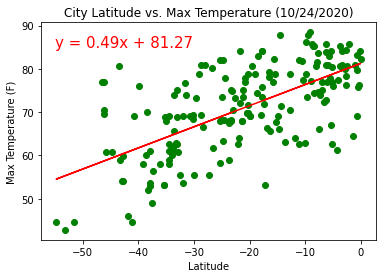

In [72]:
slope, intercept, r_value, p_value, std_err = linregress(south_df['Lat'],south_df['Max Temp'])

print(f'The r-value is: {r_value}')
y_values = south_df['Lat']*slope+intercept
plt.scatter(south_df['Lat'],south_df['Max Temp'],color="g")
plt.plot(south_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(-55,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature ({analysisDate})')
plt.savefig("output_data/South_Lat_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31720566148552115


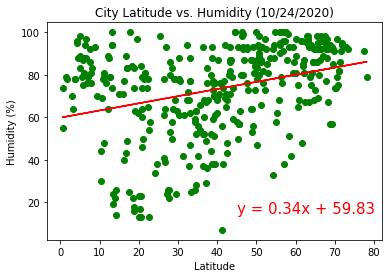

In [73]:
slope, intercept, r_value, p_value, std_err = linregress(north_df['Lat'],north_df['Humidity'])

print(f'The r-value is: {r_value}')
y_values = north_df['Lat']*slope+intercept
plt.scatter(north_df['Lat'],north_df['Humidity'],color="g")
plt.plot(north_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({analysisDate})')
plt.savefig("output_data/North_Lat_Hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11871028442125367


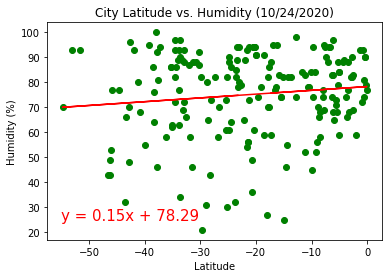

In [74]:
slope, intercept, r_value, p_value, std_err = linregress(south_df['Lat'],south_df['Humidity'])

print(f'The r-value is: {r_value}')
y_values = south_df['Lat']*slope+intercept
plt.scatter(south_df['Lat'],south_df['Humidity'],color="g")
plt.plot(south_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({analysisDate})')
plt.savefig("output_data/South_Lat_Hum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20825129649645388


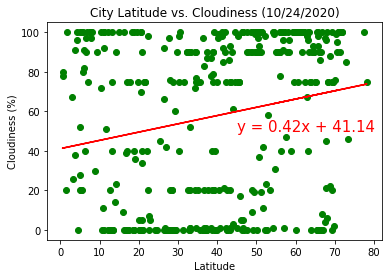

In [75]:
slope, intercept, r_value, p_value, std_err = linregress(north_df['Lat'],north_df['Cloudiness'])

print(f'The r-value is: {r_value}')
y_values = north_df['Lat']*slope+intercept
plt.scatter(north_df['Lat'],north_df['Cloudiness'],color="g")
plt.plot(north_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({analysisDate})')
plt.savefig("output_data/North_Lat_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.040807286279299


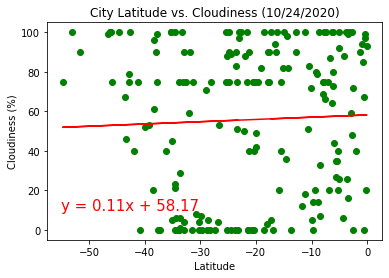

In [76]:
slope, intercept, r_value, p_value, std_err = linregress(south_df['Lat'],south_df['Cloudiness'])

print(f'The r-value is: {r_value}')
y_values = south_df['Lat']*slope+intercept
plt.scatter(south_df['Lat'],south_df['Cloudiness'],color="g")
plt.plot(south_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({analysisDate})')
plt.savefig("output_data/South_Lat_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14405982963084638


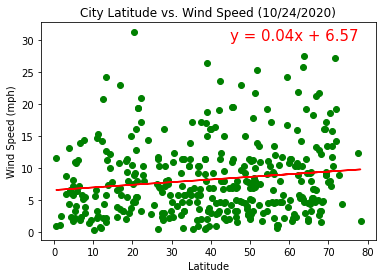

In [77]:
slope, intercept, r_value, p_value, std_err = linregress(north_df['Lat'],north_df['Wind Speed'])

print(f'The r-value is: {r_value}')
y_values = north_df['Lat']*slope+intercept
plt.scatter(north_df['Lat'],north_df['Wind Speed'],color="g")
plt.plot(north_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed ({analysisDate})')
plt.savefig("output_data/North_Lat_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2415982992422273


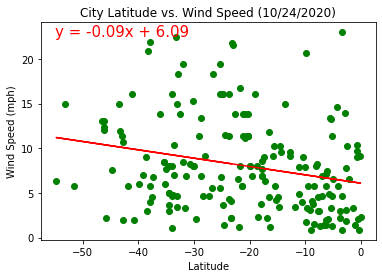

In [78]:
slope, intercept, r_value, p_value, std_err = linregress(south_df['Lat'],south_df['Wind Speed'])

print(f'The r-value is: {r_value}')
y_values = south_df['Lat']*slope+intercept
plt.scatter(south_df['Lat'],south_df['Wind Speed'],color="g")
plt.plot(south_df['Lat'],y_values,color="red")
plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}',(-55,22.6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed ({analysisDate})')
plt.savefig("output_data/South_Lat_Wind.png")
plt.show()

# Analysis
- There is strong correlation shown between Temp and Latitude on both the North and South side
- As Latitude moves away from 0, Max temp decreases
- This supports the idea that temperatures fall as you travel further from the equator
- There are no other strong correlations present, suggesting that latitude does not influence humidity, wind speed, or cloudiness.